In [1]:
import tensorflow as tf
import numpy as np
from predictor import Predictor
import matplotlib.pyplot as plt
import pandas as pd
import math
from  models import esum2
import random

In [2]:
input_width = 16
label_width = 1
shift = 1
sections = int(math.log2(input_width))
model = "models/trendencoder2"
# model = dense_model((input_width, sample_width), units=2 ** 12, sections=sections)
predictor = Predictor("datas/EURUSD_H1 copy.csv", model,
    input_width=input_width,
    label_width=label_width,
    shift=shift,
    train_ratio=0.8,
    val_ratio=0.1,
    test_ratio=0.1,
    batch_size=256,
)

Размер train: 43447
Размер validation: 5430
Размер test: 5432
Размер окна: 17
Размер входа: 16
Размер выхода: 1
Индексы входа: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Индексы выхода: [16]


In [11]:
df = pd.read_csv(
    "datas/EURUSD_H1 copy.csv", sep="\t", header=0, dtype={"open": float,"close": float,"tickvol": float,"vol": float},
    parse_dates=[[0,1]],
    index_col=[0],
    names=["date","time","open","high","low","close","tickvol","vol","spread"])
t_count = 2**6
t_shift = random.randint(0,2**14)
prices = df['open'][-t_count-t_shift:-1-t_shift]
shift = predictor.dataloader.input_width
ds = predictor.dataloader.make_dataset(prices)
inp = predictor.dataloader.make_input(prices)
# print(np.array(prices))
for i,l in ds:
    print(i.shape, l.shape)
for i in inp:
    print(i.shape)
labels = l.numpy()
n = len(labels)
# print(i.numpy()[shift+16:].flatten())
# print(labels)

(46, 16) (46, 1)
(47, 16)


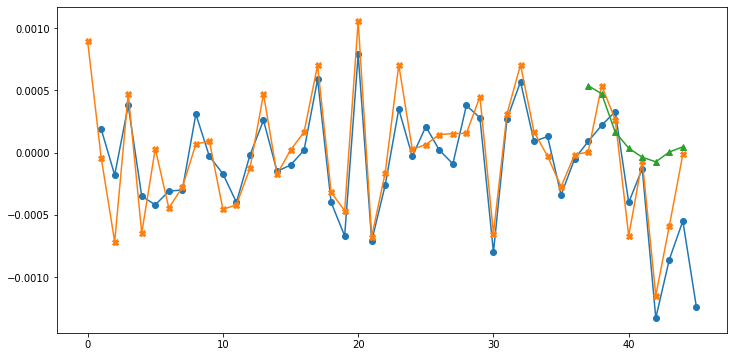

In [12]:
inputs = []
result1 = []
for i in range(len(prices)-predictor.dataloader.input_width-2):
    inputs.append((prices[i+predictor.dataloader.input_width+1]-prices[i+predictor.dataloader.input_width]))
    r = predictor.iterate(prices[i:i+predictor.dataloader.input_width+1], steps=1)
    result1.append(r)

outputs = predictor.iterate(prices[:-8], steps=8)
t = np.arange(n)
plt.subplots(nrows=1, ncols=1,figsize=(12,6))
plt.plot(t[1:n],inputs[0:n], marker='o')
plt.plot(t[:n-1],result1[0:n-1], marker='X')

plt.plot(t[-len(outputs)-1:n-1],outputs, marker='^')

